# bank churn

In [48]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns


In [49]:
bank_df = pd.read_csv('./data/BankChurners.csv')
bank_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 23 columns):
 #   Column                                                                                                                              Non-Null Count  Dtype  
---  ------                                                                                                                              --------------  -----  
 0   CLIENTNUM                                                                                                                           10127 non-null  int64  
 1   Attrition_Flag                                                                                                                      10127 non-null  object 
 2   Customer_Age                                                                                                                        10127 non-null  int64  
 3   Gender                                                                           

In [50]:
bank_df_drop = bank_df.drop(['CLIENTNUM', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_1', 'Naive_Bayes_Classifier_Attrition_Flag_Card_Category_Contacts_Count_12_mon_Dependent_count_Education_Level_Months_Inactive_12_mon_2'], axis=1)
bank_df_drop.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10127 entries, 0 to 10126
Data columns (total 20 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Attrition_Flag            10127 non-null  object 
 1   Customer_Age              10127 non-null  int64  
 2   Gender                    10127 non-null  object 
 3   Dependent_count           10127 non-null  int64  
 4   Education_Level           10127 non-null  object 
 5   Marital_Status            10127 non-null  object 
 6   Income_Category           10127 non-null  object 
 7   Card_Category             10127 non-null  object 
 8   Months_on_book            10127 non-null  int64  
 9   Total_Relationship_Count  10127 non-null  int64  
 10  Months_Inactive_12_mon    10127 non-null  int64  
 11  Contacts_Count_12_mon     10127 non-null  int64  
 12  Credit_Limit              10127 non-null  float64
 13  Total_Revolving_Bal       10127 non-null  int64  
 14  Avg_Op

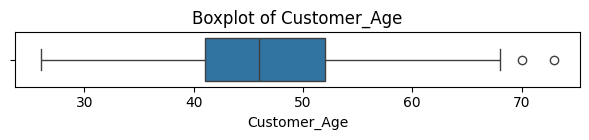

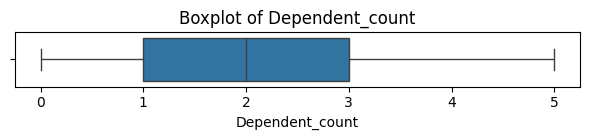

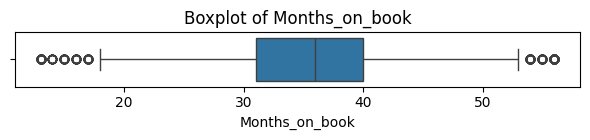

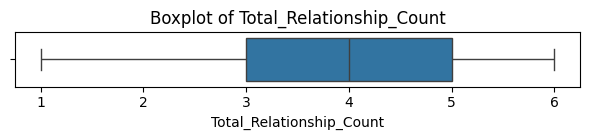

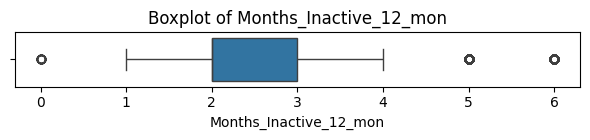

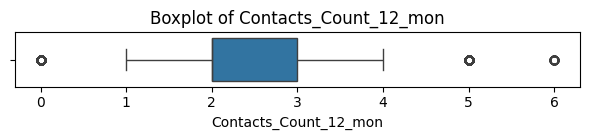

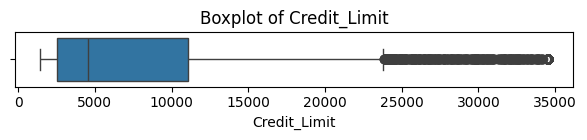

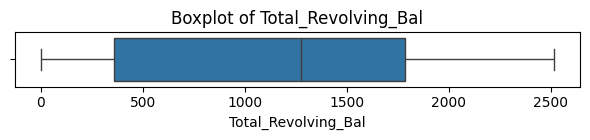

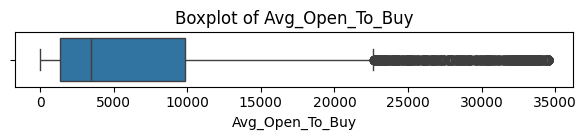

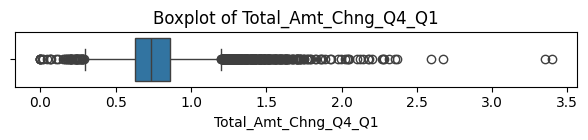

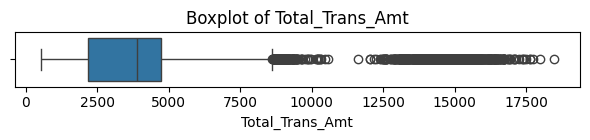

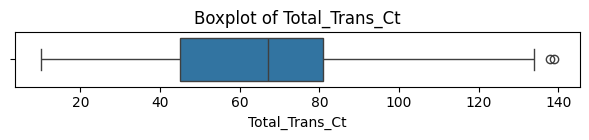

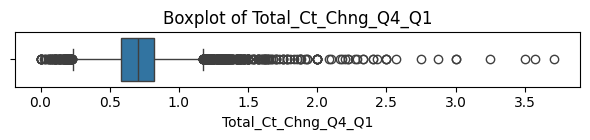

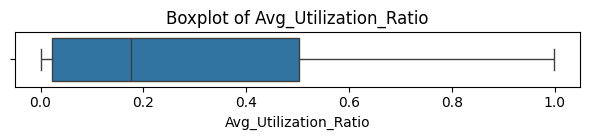

In [38]:
numerical_cols = bank_df_drop.select_dtypes(include=['int64', 'float64']).columns.tolist()


for col in numerical_cols:
    plt.figure(figsize=(6, 1.5))
    sns.boxplot(x=bank_df_drop[col])
    plt.title(f'Boxplot of {col}')
    plt.tight_layout()
    plt.show()

In [39]:
bank_df_drop.isnull().sum()

Attrition_Flag              0
Customer_Age                0
Gender                      0
Dependent_count             0
Education_Level             0
Marital_Status              0
Income_Category             0
Card_Category               0
Months_on_book              0
Total_Relationship_Count    0
Months_Inactive_12_mon      0
Contacts_Count_12_mon       0
Credit_Limit                0
Total_Revolving_Bal         0
Avg_Open_To_Buy             0
Total_Amt_Chng_Q4_Q1        0
Total_Trans_Amt             0
Total_Trans_Ct              0
Total_Ct_Chng_Q4_Q1         0
Avg_Utilization_Ratio       0
dtype: int64

In [53]:
print(bank_df_drop['Education_Level'].value_counts())

Education_Level
Graduate         3128
High School      2013
Unknown          1519
Uneducated       1487
College          1013
Post-Graduate     516
Doctorate         451
Name: count, dtype: int64


In [40]:
from sklearn.preprocessing import LabelEncoder

bank_df_drop_label = bank_df_drop.copy()

cols_to_encode = ['Gender']

label_encoders = {}
for col in cols_to_encode:
    L_encoder = LabelEncoder()
    bank_df_drop_label[col] = L_encoder.fit_transform(bank_df_drop_label[col])
    label_encoders[col] = L_encoder

print(bank_df_drop_label.head())

# Gender : ['F', 'M']

      Attrition_Flag  Customer_Age  Gender  Dependent_count Education_Level  \
0  Existing Customer            45       1                3     High School   
1  Existing Customer            49       0                5        Graduate   
2  Existing Customer            51       1                3        Graduate   
3  Existing Customer            40       0                4     High School   
4  Existing Customer            40       1                3      Uneducated   

  Marital_Status Income_Category Card_Category  Months_on_book  \
0        Married     $60K - $80K          Blue              39   
1         Single  Less than $40K          Blue              44   
2        Married    $80K - $120K          Blue              36   
3        Unknown  Less than $40K          Blue              34   
4        Married     $60K - $80K          Blue              21   

   Total_Relationship_Count  Months_Inactive_12_mon  Contacts_Count_12_mon  \
0                         5                       

In [41]:
label_encoders['Gender'].classes_

array(['F', 'M'], dtype=object)

In [42]:
# 복사본 생성
bank_df_drop_label_onehot = bank_df_drop_label.copy()

# 원-핫 인코딩할 컬럼
cols_to_encode = ['Education_Level', 'Marital_Status', 'Card_Category']

# 원-핫 인코딩 수행
bank_df_drop_label_onehot = pd.get_dummies(bank_df_drop_label_onehot, columns=cols_to_encode, drop_first=True)

# 원-핫 인코딩된 컬럼만 선택 (bool 타입인 컬럼 찾기)
bool_columns = bank_df_drop_label_onehot.select_dtypes(include='bool').columns

# 해당 컬럼을 0/1로 변환
bank_df_drop_label_onehot[bool_columns] = bank_df_drop_label_onehot[bool_columns].astype(int)

# 결과 확인
print(bank_df_drop_label_onehot.head())

      Attrition_Flag  Customer_Age  Gender  Dependent_count Income_Category  \
0  Existing Customer            45       1                3     $60K - $80K   
1  Existing Customer            49       0                5  Less than $40K   
2  Existing Customer            51       1                3    $80K - $120K   
3  Existing Customer            40       0                4  Less than $40K   
4  Existing Customer            40       1                3     $60K - $80K   

   Months_on_book  Total_Relationship_Count  Months_Inactive_12_mon  \
0              39                         5                       1   
1              44                         6                       1   
2              36                         4                       1   
3              34                         3                       4   
4              21                         5                       1   

   Contacts_Count_12_mon  Credit_Limit  ...  Education_Level_High School  \
0                     

In [43]:
unknown_rows = bank_df_drop_label_onehot[bank_df_drop_label_onehot['Income_Category'] == 'Unknown']
print(unknown_rows)

          Attrition_Flag  Customer_Age  Gender  Dependent_count  \
19     Existing Customer            45       0                2   
28     Existing Customer            44       0                3   
39     Attrited Customer            66       0                0   
44     Existing Customer            38       0                4   
58     Existing Customer            44       0                5   
...                  ...           ...     ...              ...   
10021  Attrited Customer            30       0                1   
10040  Attrited Customer            50       0                3   
10083  Existing Customer            42       0                4   
10092  Attrited Customer            40       0                3   
10119  Attrited Customer            55       0                3   

      Income_Category  Months_on_book  Total_Relationship_Count  \
19            Unknown              37                         6   
28            Unknown              34                        

In [44]:
# 'Attrition_Flag' 인코딩: Attrited Customer → 1, Existing Customer → 0
bank_df_drop_label_onehot['Attrition_Flag'] = bank_df_drop_label_onehot['Attrition_Flag'].map({
    'Existing Customer': 0,
    'Attrited Customer': 1
})

bank_df_drop_label_onehot

,Attrition_Flag,Customer_Age,Gender,Dependent_count,Income_Category,Months_on_book,Total_Relationship_Count,Months_Inactive_12_mon,Contacts_Count_12_mon,Credit_Limit,...,Education_Level_High School,Education_Level_Post-Graduate,Education_Level_Uneducated,Education_Level_Unknown,Marital_Status_Married,Marital_Status_Single,Marital_Status_Unknown,Card_Category_Gold,Card_Category_Platinum,Card_Category_Silver
0,0,45,1,3,$60K - $80K,39,5,1,3,12691.0,...,1,0,0,0,1,0,0,0,0,0
1,0,49,0,5,Less than $40K,44,6,1,2,8256.0,...,0,0,0,0,0,1,0,0,0,0
2,0,51,1,3,$80K - $120K,36,4,1,0,3418.0,...,0,0,0,0,1,0,0,0,0,0
3,0,40,0,4,Less than $40K,34,3,4,1,3313.0,...,1,0,0,0,0,0,1,0,0,0
4,0,40,1,3,$60K - $80K,21,5,1,0,4716.0,...,0,0,1,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10122,0,50,1,2,$40K - $60K,40,3,2,3,4003.0,...,0,0,0,0,0,1,0,0,0,0
10123,1,41,1,2,$40K - $60K,25,4,2,3,4277.0,...,0,0,0,1,0,0,0,0,0,0
10124,1,44,0,1,Less than $40K,36,5,3,4,5409.0,...,1,0,0,0,1,0,0,0,0,0
10125,1,30,1,2,$40K - $60K,36,4,3,3,5281.0,...,0,0,0,0,0,0,1,0,0,0


In [51]:
print(bank_df_drop_label_onehot['Card_Category'].value_counts())

KeyError: 'Card_Category'

In [ ]:
# 'Unknown' 값을 가진 행 제거
bank_df_drop_label_onehot_wo_unknown = bank_df_drop_label_onehot[bank_df_drop_label_onehot['Income_Category'] != 'Unknown'].copy()

# 인덱스 초기화 (선택사항)
bank_df_drop_label_onehot_wo_unknown = bank_df_drop_label_onehot_wo_unknown.reset_index(drop=True)

# 결과 확인
print(bank_df_drop_label_onehot_wo_unknown['Income_Category'].value_counts())

Income_Category
Less than $40K    3561
$40K - $60K       1790
$80K - $120K      1535
$60K - $80K       1402
$120K +            727
Name: count, dtype: int64


In [ ]:
# 소득 카테고리 매핑 정의
income_map = {
    'Less than $40K': 0,
    '$40K - $60K': 1,
    '$60K - $80K': 2,
    '$80K - $120K': 3,
    '$120K +': 4
}

# 복사본에 적용
bank_df_drop_label_onehot_wo_unknown['Income_Category'] = bank_df_drop_label_onehot_wo_unknown['Income_Category'].map(income_map).astype(int)

# 결과 확인
print(bank_df_drop_label_onehot_wo_unknown['Income_Category'].value_counts())

Income_Category
0    3561
1    1790
3    1535
2    1402
4     727
Name: count, dtype: int64


In [ ]:
# 소득 카테고리 매핑 정의
income_map = {
    'Less than $40K': 0,
    '$40K - $60K': 1,
    '$60K - $80K': 2,
    '$80K - $120K': 3,
    '$120K +': 4,
    'Unknown': -1
}
bank_df_drop_label_onehot_w_unknown = bank_df_drop_label_onehot
# 복사본에 적용
bank_df_drop_label_onehot_w_unknown['Income_Category'] = bank_df_drop_label_onehot['Income_Category'].map(income_map)

# 결과 확인
print(bank_df_drop_label_onehot_w_unknown['Income_Category'].value_counts())

Income_Category
 0    3561
 1    1790
 3    1535
 2    1402
-1    1112
 4     727
Name: count, dtype: int64


In [ ]:
corr = bank_df_drop_label_onehot_w_unknown.corr(numeric_only=True)
print(corr['Attrition_Flag'].to_string())
# print(corr['Attrition_Flag'].sort_values(ascending=False).to_string())
# sns.heatmap(corr, annot=True, fmt=".2f", cmap="rocket", annot_kws={"size" : 9}, linewidths=0.5)
# plt.figure(figsize=(140,80))
# plt.tight_layout()
# plt.show()

Attrition_Flag                   1.000000
Customer_Age                     0.018203
Gender                          -0.037272
Dependent_count                  0.018991
Income_Category                 -0.013577
Months_on_book                   0.013687
Total_Relationship_Count        -0.150005
Months_Inactive_12_mon           0.152449
Contacts_Count_12_mon            0.204491
Credit_Limit                    -0.023873
Total_Revolving_Bal             -0.263053
Avg_Open_To_Buy                 -0.000285
Total_Amt_Chng_Q4_Q1            -0.131063
Total_Trans_Amt                 -0.168598
Total_Trans_Ct                  -0.371403
Total_Ct_Chng_Q4_Q1             -0.290054
Avg_Utilization_Ratio           -0.178410
Education_Level_Doctorate        0.029386
Education_Level_Graduate        -0.009046
Education_Level_High School     -0.011730
Education_Level_Post-Graduate    0.011127
Education_Level_Uneducated      -0.001444
Education_Level_Unknown          0.009005
Marital_Status_Married          -0

# 여기서부터 다시 수정해보기

In [54]:
X = bank_df_drop_label_onehot_w_unknown.drop('Attrition_Flag', axis=1)
y = bank_df_drop_label_onehot_w_unknown['Attrition_Flag']

In [55]:
# columns_to_scale = [
#     'CreditScore', 'Age', 'Balance', 'EstimatedSalary', 'Point Earned'
# ]


In [56]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [57]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()

X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

✅ Accuracy : 0.8985
✅ Precision: 0.7664
✅ Recall   : 0.5561
✅ F1 Score : 0.6445
              precision    recall  f1-score   support

           0       0.92      0.97      0.94      2113
           1       0.77      0.56      0.64       419

    accuracy                           0.90      2532
   macro avg       0.84      0.76      0.79      2532
weighted avg       0.89      0.90      0.89      2532



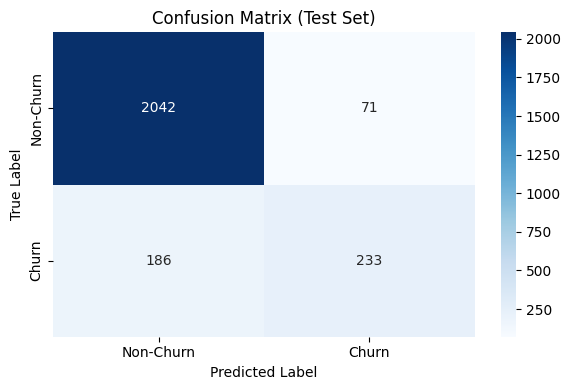

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 모델 정의 및 학습
model = LogisticRegression(max_iter=1000, random_state=42)
model.fit(X_train_scaled, y_train)

# 예측
y_pred = model.predict(X_test_scaled)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

# 결과 출력
print(f"✅ Accuracy : {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall   : {recall:.4f}")
print(f"✅ F1 Score : {f1:.4f}")
print(classification_report(y_test, y_pred))


# 혼동행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Churn', 'Churn'], 
            yticklabels=['Non-Churn', 'Churn'])
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()


✅ Accuracy : 0.9546
✅ Precision: 0.9343
✅ Recall   : 0.7804
✅ F1 Score : 0.8505
              precision    recall  f1-score   support

           0       0.96      0.99      0.97      2113
           1       0.93      0.78      0.85       419

    accuracy                           0.95      2532
   macro avg       0.95      0.88      0.91      2532
weighted avg       0.95      0.95      0.95      2532



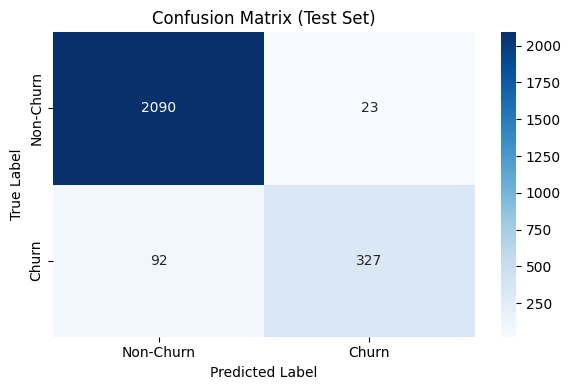

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# 랜덤 포레스트 모델 학습
rf_model = RandomForestClassifier(random_state=42)
rf_model.fit(X_train_scaled, y_train)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

# 결과 출력
print(f"✅ Accuracy : {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall   : {recall:.4f}")
print(f"✅ F1 Score : {f1:.4f}")

# 예측 및 평가
y_pred = rf_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# 혼동행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Churn', 'Churn'], 
            yticklabels=['Non-Churn', 'Churn'])
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\xgboost\core.py:158: UserWarning: [08:13:18] WARNING: C:\buildkite-agent\builds\buildkite-windows-cpu-autoscaling-group-i-08cbc0333d8d4aae1-1\xgboost\xgboost-ci-windows\src\learner.cc:740: 
Parameters: { "use_label_encoder" } are not used.

  warnings.warn(smsg, UserWarning)


✅ Accuracy : 0.9546
✅ Precision: 0.9343
✅ Recall   : 0.7804
✅ F1 Score : 0.8505
              precision    recall  f1-score   support

           0       0.98      0.98      0.98      2113
           1       0.90      0.89      0.90       419

    accuracy                           0.97      2532
   macro avg       0.94      0.94      0.94      2532
weighted avg       0.97      0.97      0.97      2532



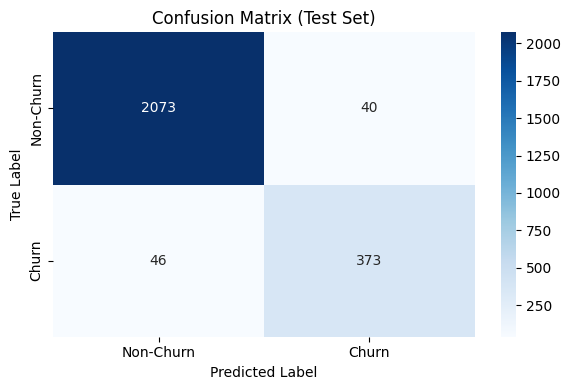

In [64]:
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, classification_report, precision_score, recall_score, f1_score, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

# XGBoost 모델 학습
xgb_model = XGBClassifier(use_label_encoder=False, eval_metric='logloss', random_state=42)
xgb_model.fit(X_train_scaled, y_train)

# 평가 지표 계산
accuracy = accuracy_score(y_test, y_pred)
precision = precision_score(y_test, y_pred, zero_division=0)
recall = recall_score(y_test, y_pred, zero_division=0)
f1 = f1_score(y_test, y_pred, zero_division=0)

# 결과 출력
print(f"✅ Accuracy : {accuracy:.4f}")
print(f"✅ Precision: {precision:.4f}")
print(f"✅ Recall   : {recall:.4f}")
print(f"✅ F1 Score : {f1:.4f}")

# 예측 및 평가
y_pred = xgb_model.predict(X_test_scaled)
print(classification_report(y_test, y_pred))

# 혼동행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', 
            xticklabels=['Non-Churn', 'Churn'], 
            yticklabels=['Non-Churn', 'Churn'])
plt.title("Confusion Matrix (Test Set)")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.tight_layout()
plt.show()

c:\Users\Playdata\anaconda3\envs\pystudy_env\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


✅ Accuracy : 0.9637
✅ Precision: 0.9431
✅ Recall   : 0.8305
✅ F1 Score : 0.8832


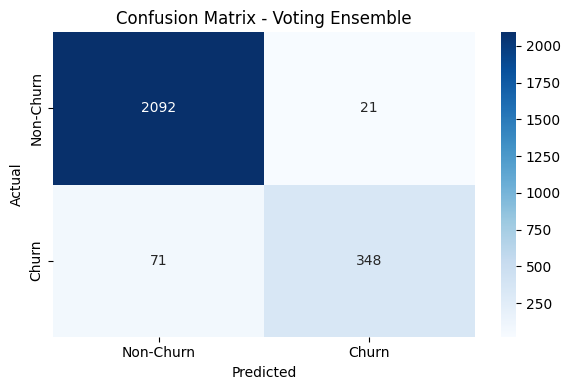

In [65]:
# soft voting

from sklearn.ensemble import VotingClassifier

lr_clf = LogisticRegression(max_iter=1000, random_state=42)
rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
xgb_clf = XGBClassifier(eval_metric='logloss', random_state=42)

# 소프트 보팅 앙상블
voting_clf = VotingClassifier(
    estimators=[('lr', lr_clf), ('rf', rf_clf), ('xgb', xgb_clf)],
    voting='soft'  # 'hard'로 바꾸면 다수결 방식
)

# 학습
voting_clf.fit(X_train, y_train)

# 예측
y_pred = voting_clf.predict(X_test)

# 평가 지표
print(f"✅ Accuracy : {accuracy_score(y_test, y_pred):.4f}")
print(f"✅ Precision: {precision_score(y_test, y_pred, zero_division=0):.4f}")
print(f"✅ Recall   : {recall_score(y_test, y_pred, zero_division=0):.4f}")
print(f"✅ F1 Score : {f1_score(y_test, y_pred, zero_division=0):.4f}")

# 혼동행렬 시각화
cm = confusion_matrix(y_test, y_pred)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=['Non-Churn', 'Churn'],
            yticklabels=['Non-Churn', 'Churn'])
plt.title("Confusion Matrix - Voting Ensemble")
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.tight_layout()
plt.show()